In [27]:
#Import Tensor Flow Development Framework
import tensorflow as tf

In [29]:
#Import the Fashion MNIST dataset
from tensorflow.keras.datasets import fashion_mnist

In [31]:
#Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [33]:
#Import the essential layers and preprocess the data
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to include channel dimension (28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [35]:
from tensorflow.keras import layers, models, Input

# Define our convolutional neural network
def create_cnn_model():
    model = models.Sequential([
        # Explicit Input layer
        Input(shape=(28, 28, 1)),  

        # Layer 1: Convolutional layer
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Layer 2: Convolutional layer
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Layer 3: Convolutional layer
        layers.Conv2D(128, (3, 3), activation='relu'),

        # Flatten the output
        layers.Flatten(),

        # Layer 4: Fully connected layer
        layers.Dense(128, activation='relu'),

        # Layer 5: Dropout for regularization
        layers.Dropout(0.5),

        # Layer 6: Output layer
        layers.Dense(10, activation='softmax')
    ])
    return model

# Create the CNN model
model = create_cnn_model()



In [39]:
from tensorflow.keras import layers, models, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values (0 to 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape images to add a single color channel (grayscale)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)  # Convert labels to one-hot
y_test = to_categorical(y_test, 10)

# Define the CNN model
def create_cnn_model():
    model = models.Sequential([
        Input(shape=(28, 28, 1)),  # Input layer
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Recreate and compile the model
model = create_cnn_model()

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Now train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 0.6805 - loss: 0.8614 - val_accuracy: 0.8519 - val_loss: 0.3992
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.8533 - loss: 0.4114 - val_accuracy: 0.8795 - val_loss: 0.3296
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.8779 - loss: 0.3439 - val_accuracy: 0.8945 - val_loss: 0.3003
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.8919 - loss: 0.3011 - val_accuracy: 0.8938 - val_loss: 0.2941
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9016 - loss: 0.2764 - val_accuracy: 0.8970 - val_loss: 0.2806
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9069 - loss: 0.2576 - val_accuracy: 0.8991 - val_loss: 0.2839
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9147 - loss: 0.2375 - val_accuracy: 0.8969 - val_loss: 0.2871
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.9184 - loss: 0.2220 - 

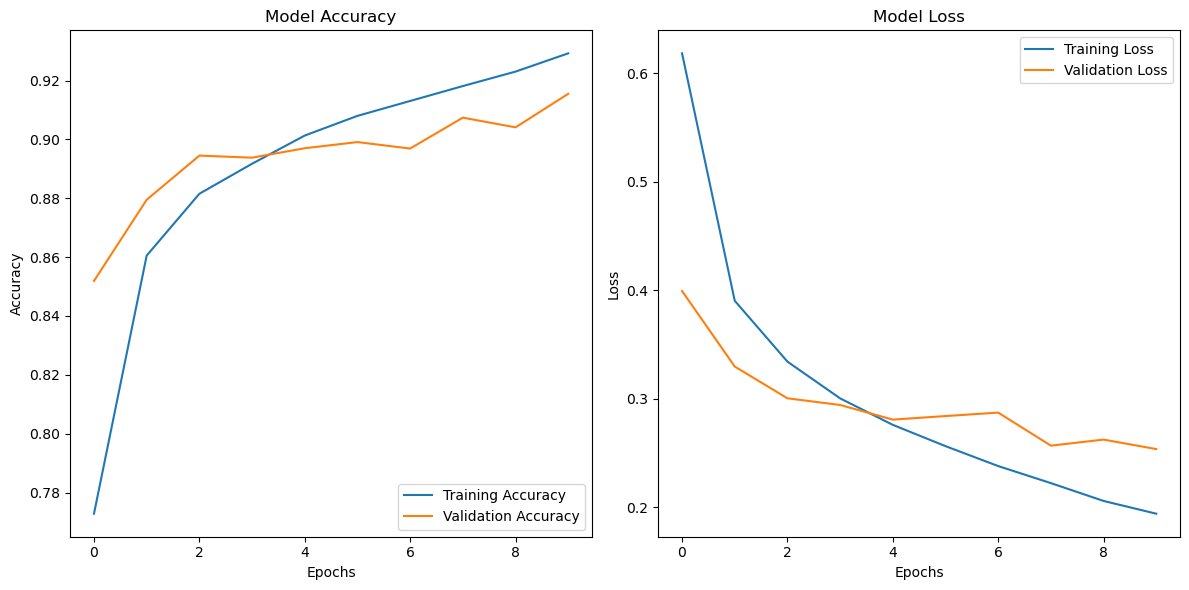

In [91]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()


In [93]:
from sklearn.metrics import precision_score, recall_score, classification_report
import numpy as np

# Make predictions
y_pred = model.predict(x_test)  # Probabilities for each class
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# If y_test is one-hot encoded, you need to convert it to class labels as well
y_test_classes = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class labels

# Calculate Precision and Recall for each class
precision = precision_score(y_test_classes, y_pred_classes, average=None)  # For each class
recall = recall_score(y_test_classes, y_pred_classes, average=None)  # For each class

# Print the classification report for detailed evaluation
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

# Calculate the average precision and recall (macro average or weighted average)
precision_macro = precision_score(y_test_classes, y_pred_classes, average='macro')
recall_macro = recall_score(y_test_classes, y_pred_classes, average='macro')

print(f"Macro-averaged Precision: {precision_macro}")
print(f"Macro-averaged Recall: {recall_macro}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.89      0.86      0.88      1000
           3       0.91      0.93      0.92      1000
           4       0.86      0.89      0.87      1000
           5       0.98      0.99      0.98      1000
           6       0.78      0.71      0.74      1000
           7       0.96      0.96      0.96      1000
           8       0.97      0.99      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.91      0.92      0.91     10000
weighted avg       0.91      0.92      0.91     10000

Macro-averaged Precision: 0.9148375305555497
Macro-averaged Recall: 0.9155


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


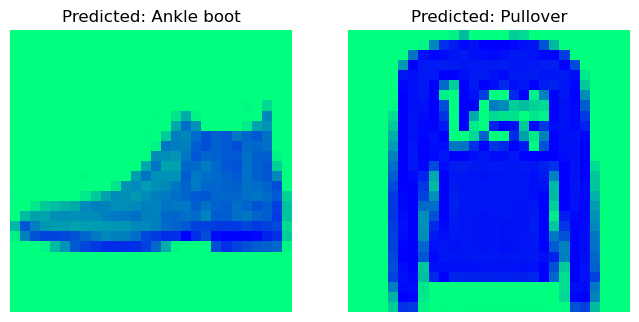

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Choose two images to predict 
images_to_predict = x_test[:2]  # Get the first two images from the test set

# Predict the classes for the images
predictions = model.predict(images_to_predict)

# Convert predictions to one of ten class labels
predicted_classes = np.argmax(predictions, axis=1)

# Function to display the image and predicted label
def display_prediction(image, label, prediction):

# Visualize the images and print their predicted labels
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the first two images with predictions
plt.figure(figsize=(8, 4))

for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(images_to_predict[i].reshape(28, 28), cmap='winter_r')
    plt.title(f"Predicted: {class_names[predicted_classes[i]]}")
    plt.axis('off')

plt.show()
